In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Datasets/cleaned_df.csv', index_col='date')

In [54]:
df.index = pd.to_datetime(df.index)

In [55]:
df.head(369)

,state_name,county_name,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,,,,
2013-01-01,California,Alameda,1,62,Moderate,PM2.5,06-001-0007,4
2013-01-02,California,Alameda,1,61,Moderate,PM2.5,06-001-0007,4
2013-01-03,California,Alameda,1,81,Moderate,PM2.5,06-001-0007,4
2013-01-04,California,Alameda,1,78,Moderate,PM2.5,06-001-0007,4
2013-01-05,California,Alameda,1,84,Moderate,PM2.5,06-001-0007,4
...,...,...,...,...,...,...,...,...
2013-12-31,California,Alameda,1,101,Unhealthy for Sensitive Groups,PM2.5,06-001-0007,3
2013-03-29,California,Alpine,3,21,Good,PM2.5,06-003-1001,1
2013-04-10,California,Alpine,3,21,Good,PM2.5,06-003-1001,1


In [65]:
len(df['county_code'].unique())

54

In [56]:
aqi_county = df.groupby('county_name').mean()
aqi_county.sort_values('aqi', ascending=False).head(20)

,county_code,aqi,number_of_sites_reporting
county_name,,,
San Bernardino,71.0,96.003051,13.321051
Riverside,65.0,95.258214,15.007635
Kern,29.0,89.184826,9.743559
Los Angeles,37.0,88.113571,15.768333
Tulare,107.0,85.825862,3.845341
Fresno,19.0,83.543929,7.980424
Kings,31.0,75.237159,2.630264
Inyo,27.0,69.379166,13.240270
San Diego,73.0,69.166903,10.575414


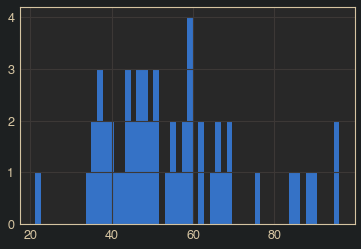

In [67]:
plt.hist(aqi_county['aqi'], bins=54); #bins equal to exact count of counties

In [78]:
def_param = df.groupby('defining_parameter').mean()
def_param = def_param.reset_index()

In [79]:
def_param

,defining_parameter,county_code,aqi,number_of_sites_reporting
0,CO,51.507463,25.164179,3.626866
1,NO2,57.858324,41.573319,5.176957
2,Ozone,58.499788,53.886557,4.279999
3,PM10,47.809114,73.795398,5.031399
4,PM2.5,58.042919,56.720513,4.194530
5,SO2,52.862069,66.586207,9.068966


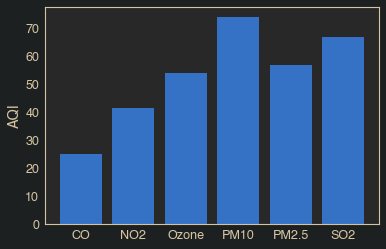

In [83]:
plt.bar(x=def_param['defining_parameter'], height=def_param['aqi'])
plt.grid(False)
plt.ylabel('AQI');

In [89]:
df.sort_index(ascending=True)

,state_name,county_name,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,,,,
2009-01-01,California,Fresno,19,104,Unhealthy for Sensitive Groups,PM2.5,06-019-0008,7
2009-01-01,California,Mendocino,45,20,Good,Ozone,06-045-0008,1
2009-01-01,California,Mono,51,56,Moderate,PM10,06-051-0001,3
2009-01-01,California,Inyo,27,53,Moderate,PM10,06-027-1003,14
2009-01-01,California,Orange,59,156,Unhealthy,PM2.5,06-059-0007,4
...,...,...,...,...,...,...,...,...
2020-10-30,California,Riverside,65,40,Good,PM10,06-065-0500,2
2020-10-31,California,Plumas,63,69,Moderate,PM2.5,06-063-1006,3
2020-10-31,California,Kings,31,103,Unhealthy for Sensitive Groups,PM10,06-031-0500,1


In [94]:
df.index = pd.to_datetime(df.index)

In [98]:
df_daily = df.resample('D').mean()

In [101]:
def auto_corr(lag):
    ac = df_daily['aqi'].autocorr(lag=lag)
    print(f'Autocorellation for {lag} day(s) is: {ac}')

In [102]:
print(auto_corr(1), auto_corr(2), auto_corr(7), auto_corr(30), auto_corr(365))

Autocorellation for 1 day(s) is: 0.6405783382599282
Autocorellation for 2 day(s) is: 0.47254052609570435
Autocorellation for 7 day(s) is: 0.27212753344972235
Autocorellation for 30 day(s) is: 0.14650526083550477
Autocorellation for 365 day(s) is: 0.16687468620962348
None None None None None


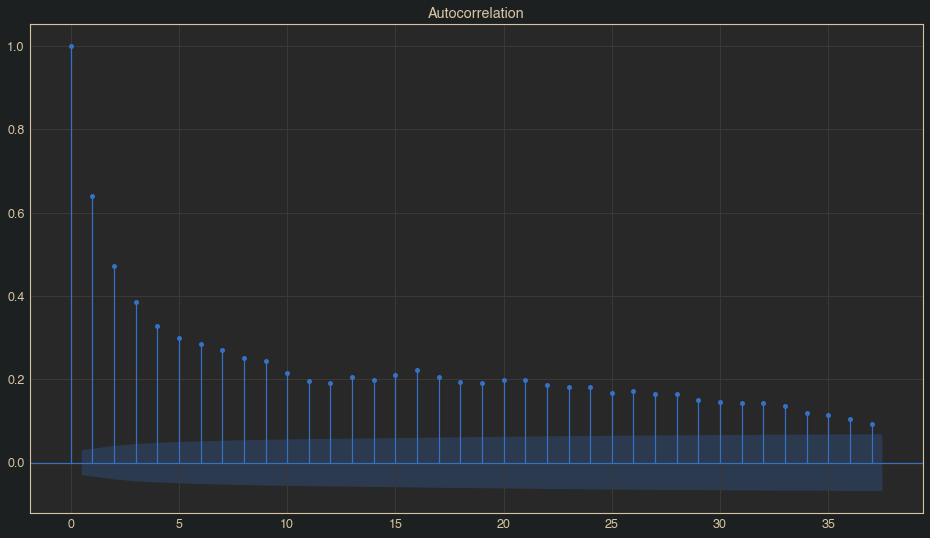

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(16,9))
plot_acf(df_daily['aqi'], ax=ax);

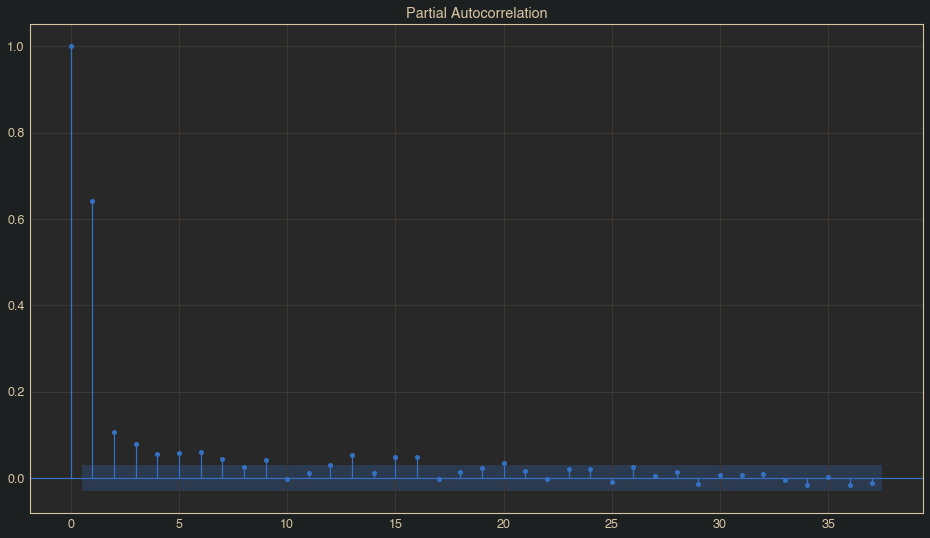

In [107]:
fig, ax = plt.subplots(figsize=(16,9))
plot_pacf(df_daily['aqi'], ax=ax);

In [110]:
df.index.unique().sort_values(ascending=False)

DatetimeIndex(['2020-10-31', '2020-10-30', '2020-10-29', '2020-10-28',
               '2020-10-27', '2020-10-26', '2020-10-25', '2020-10-24',
               '2020-10-23', '2020-10-22',
               ...
               '2009-01-10', '2009-01-09', '2009-01-08', '2009-01-07',
               '2009-01-06', '2009-01-05', '2009-01-04', '2009-01-03',
               '2009-01-02', '2009-01-01'],
              dtype='datetime64[ns]', name='date', length=4322, freq=None)

In [111]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [116]:
type(df['aqi'])

pandas.core.series.Series

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218538 entries, 2013-01-01 to 2009-12-31
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   state_name                 218538 non-null  object
 1   county_name                218538 non-null  object
 2   county_code                218538 non-null  int64 
 3   aqi                        218538 non-null  int64 
 4   category                   218538 non-null  object
 5   defining_parameter         218538 non-null  object
 6   defining_site              218538 non-null  object
 7   number_of_sites_reporting  218538 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 19.0+ MB


In [123]:
km = KMeans()
km.fit(df['aqi'].array.reshape(-1, 1))

ValueError: PandasArray must be 1-dimensional.

In [128]:
# one model example - San Bernardino COunty:
sb_df = df[df['county_name']=='San Bernardino']

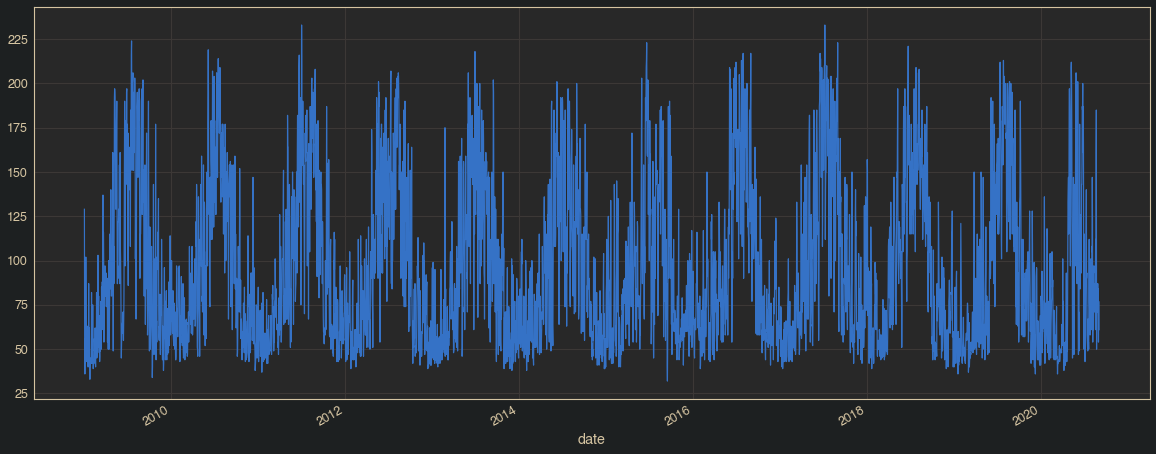

In [136]:
plt.figure(figsize=(20,8))
sb_df['aqi'].plot();

In [137]:
train = sb_df['2010': '2018']
test = sb_df['2019']

AssertionError: <class 'numpy.ndarray'>